<a href="https://colab.research.google.com/github/RehanAfzalkhan/dog_cat_classifier/blob/main/cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# import dataset code

In [3]:
!pip install -q kagglehub


In [4]:
import kagglehub

path = kagglehub.dataset_download(
    "bhavikjikadara/dog-and-cat-classification-dataset"
)

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'dog-and-cat-classification-dataset' dataset.
Path to dataset files: /kaggle/input/dog-and-cat-classification-dataset


In [5]:
import os
mydir = os.path.join(path, "PetImages")



In [6]:
print(mydir)

/kaggle/input/dog-and-cat-classification-dataset/PetImages


In [7]:
os.listdir(mydir)


['Dog', 'Cat']

In [8]:
import os

cat_dir = os.path.join(mydir, "Cat")
dog_dir = os.path.join(mydir, "Dog")

num_cats = len(os.listdir(cat_dir))
num_dogs = len(os.listdir(dog_dir))

print("Number of Cat images:", num_cats)
print("Number of Dog images:", num_dogs)


Number of Cat images: 12499
Number of Dog images: 12499


In [9]:
categories= ['Cat','Dog']

In [10]:
# access dataset folders
for i in categories:
  folder_path= os.path.join(mydir,i)
  print(folder_path)

/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog


In [11]:
len(os.listdir(folder_path))

12499

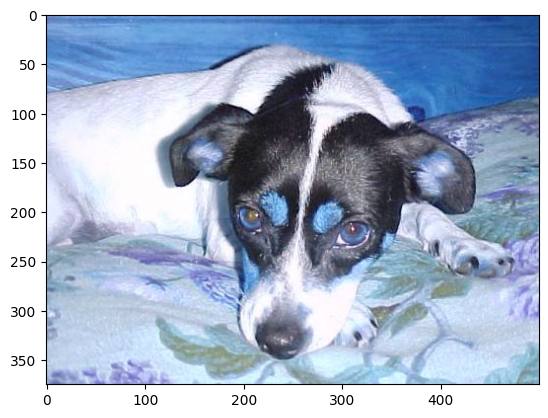

In [12]:
# read images
for i in categories:
  folder_path=os.path.join(mydir,i)

  for j in os.listdir(folder_path):
    img_path=os.path.join(folder_path,j)
    img=cv2.imread(img_path)
    plt.imshow(img)
    break


In [13]:
print(img)

[[[113 141 202]
  [117 145 206]
  [121 150 211]
  ...
  [ 28  76 148]
  [ 28  76 148]
  [ 28  76 148]]

 [[116 144 205]
  [120 148 209]
  [123 152 213]
  ...
  [ 30  78 150]
  [ 30  78 150]
  [ 30  78 150]]

 [[113 141 202]
  [116 144 205]
  [119 147 208]
  ...
  [ 32  80 152]
  [ 32  80 152]
  [ 32  80 152]]

 ...

 [[158 174 216]
  [167 183 225]
  [156 172 215]
  ...
  [134 168 191]
  [135 169 192]
  [137 171 194]]

 [[145 160 206]
  [163 178 224]
  [157 171 219]
  ...
  [133 167 190]
  [134 168 191]
  [136 170 193]]

 [[128 142 190]
  [156 170 218]
  [158 172 221]
  ...
  [132 166 189]
  [130 164 187]
  [129 163 186]]]


In [14]:
img.shape

(375, 500, 3)

In [15]:
# data=[]

# for i in categories:
#   folder_path=os.path.join(mydir,i)
#   if i == 'Cat':
#     label = 0
#   else:
#     label = 1

#   for j in os.listdir(folder_path):
#     img_path=os.path.join(folder_path,j)
#     img=cv2.imread(img_path)
#     img=cv2.resize(img,(150,150))
#     data.append([img,label])

data = []

for i in categories:
    folder_path = os.path.join(mydir, i)

    if i == 'Cat':
        label = 0
    else:
        label = 1

    for j in os.listdir(folder_path):
        img_path = os.path.join(folder_path, j)
        img = cv2.imread(img_path)

        # 🔴 IMPORTANT CHECK
        if img is None:
            continue

        img = cv2.resize(img, (150, 150))
        data.append([img, label])


In [16]:
len(data)

24997

In [17]:
print(data[7])

[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [200, 206, 212],
        [202, 207, 212],
        [203, 208, 211]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [204, 207, 212],
        [205, 208, 212],
        [205, 208, 212]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [200, 203, 208],
        [202, 205, 210],
        [205, 205, 211]],

       ...,

       [[225, 211, 212],
        [224, 210, 211],
        [222, 208, 209],
        ...,
        [ 16,  24,  22],
        [ 18,  27,  24],
        [ 18,  29,  26]],

       [[208, 196, 197],
        [207, 196, 196],
        [201, 189, 189],
        ...,
        [ 16,  23,  21],
        [ 16,  22,  21],
        [ 16,  23,  22]],

       [[215, 201, 195],
        [215, 202, 199],
        [217, 204, 204],
        ...,
        [ 18,  24,  20],
        [ 18,  24,  19],
        [ 19,  26,  21]

In [18]:
random.shuffle(data)

In [19]:
X = []
y = []

for i in data:
  X.append(i[0])
  y.append(i[1])

In [20]:
X = np.array(X)
y= np.array(y)

In [21]:
type(y)

numpy.ndarray

In [22]:
type(X)

numpy.ndarray

In [23]:
y.shape

(24997,)

In [24]:
X.shape

(24997, 150, 150, 3)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [26]:
# X_train=X_train/255
# X_test=X_test/255

In [27]:
X_train.shape

(19997, 150, 150, 3)

In [28]:
#creating Convolutional neural network here

In [33]:
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.layers import Dropout


In [34]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,396,385 (9.14 MB)

 Trainable params: 2,396,385 (9.14 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
model.fit(X_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 497s 880ms/step - accuracy: 0.5099 - loss: 16.3535 - val_accuracy: 0.4830 - val_loss: 0.6934
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 487s 853ms/step - accuracy: 0.4973 - loss: 0.6932 - val_accuracy: 0.4830 - val_loss: 0.6937
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 473s 840ms/step - accuracy: 0.5044 - loss: 0.6931 - val_accuracy: 0.4830 - val_loss: 0.6934
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 482s 856ms/step - accuracy: 0.5033 - loss: 0.6932 - val_accuracy: 0.4830 - val_loss: 0.6934
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 496s 845ms/step - accuracy: 0.5072 - loss: 0.6931 - val_accuracy: 0.4830 - val_loss: 0.6935
Epoch 6/10
186/563 ━━━━━━━━━━━━━━━━━━━━ 5:14 833ms/step - accuracy: 0.5151 - loss: 0.6929

KeyboardInterrupt: 

In [38]:
model.save("cat_dog_cnn_6epochs.h5")


In [39]:
model.save("cat_dog_cnn_6epochs.h5")       # legacy (works everywhere)
model.save("cat_dog_cnn_6epochs.keras")    # modern (recommended)


In [40]:
from google.colab import files
files.download("cat_dog_cnn_6epochs.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
from google.colab import files
files.download("cat_dog_cnn_6epochs.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>